In [1]:
!pip install transformers datasets torch accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# **Download & Load the Dataset**

In [8]:
from datasets import load_dataset

dataset = load_dataset("AtlasUnified/Atlas-Reasoning")

# Display a sample
sample = dataset['train'][0]
print(f"Sample Data:\n{sample}")


Sample Data:
{'topic': 'Deductive Reasoning', 'subtopics': ['Syllogistic Arguments', 'Assumptions', 'Abductive Reasoning', 'Modus Ponens', 'Modus Tollens', 'Problem Solving', 'Goal Oriented Thinking', 'Basic Logic', 'Analytical Thinking', 'Philosophical Debate', 'Constructing Arguments', 'Propositional Logic', 'Deduction Rules', 'Mathematical Reasoning', 'Predicate Logic', 'Conclusions', 'The Socratic Method', 'Validity and Soundness', 'Formal Systems', 'Logic Games', 'Decision Making', 'Principled Thinking', 'Inductive Reasoning', 'Predictions', 'Cognitive Theory', 'Inference', 'Quantifying Assumptions', 'Interpreting Evidence', 'Establishing Correlation', 'Rational Inquiry', 'Abductive Logic', 'Exploring Possibilities', 'Distinctions', 'Testing Hypotheses', 'Symmetry', 'Categorical Statements', 'Logical Fallacies']}


# **Preprocess the Data**

In [12]:
from transformers import T5Tokenizer

# Load tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Function to preprocess and tokenize data in batch mode
def preprocess_data(batch):
    input_texts = [f"Topic: {str(topic)}. Subtopics: {', '.join(map(str, subtopics))}"
                   for topic, subtopics in zip(batch['topic'], batch['subtopics'])]

    target_texts = ["Logical reasoning analysis."] * len(input_texts)

    inputs = tokenizer(input_texts, padding="max_length", truncation=True, max_length=512)
    targets = tokenizer(target_texts, padding="max_length", truncation=True, max_length=10)

    return {
        'input_ids': inputs['input_ids'],
        'attention_mask': inputs['attention_mask'],
        'labels': targets['input_ids']
    }

# Apply preprocessing to dataset (batch processing enabled)
tokenized_dataset = dataset.map(preprocess_data, batched=True)

# Remove original fields
tokenized_dataset = tokenized_dataset.remove_columns(["topic", "subtopics"])

# Check processed sample
print(tokenized_dataset['train'][0])


Map:   0%|          | 0/42 [00:00<?, ? examples/s]

{'input_ids': [18059, 10, 374, 28668, 21272, 53, 5, 3325, 19710, 7, 10, 5224, 40, 2152, 3040, 26583, 7, 6, 282, 4078, 102, 10872, 6, 891, 28668, 21272, 53, 6, 5073, 302, 20093, 35, 7, 6, 5073, 302, 304, 195, 35, 7, 6, 5289, 5175, 3745, 6, 17916, 3, 16495, 15, 26, 20273, 6, 11909, 3, 20641, 6, 5331, 14991, 138, 20273, 6, 24657, 1950, 9794, 342, 6, 1193, 7593, 53, 26583, 7, 6, 749, 4718, 138, 3, 20641, 6, 374, 8291, 16060, 6, 9762, 15, 4992, 138, 21272, 53, 6, 1266, 4370, 342, 3, 20641, 6, 29197, 7, 6, 37, 264, 2935, 1225, 7717, 6, 23545, 485, 11, 7047, 655, 6, 3025, 138, 5479, 6, 3, 20641, 5880, 6, 25006, 9918, 6, 22826, 26, 20273, 6, 86, 28668, 21272, 53, 6, 1266, 12472, 7, 6, 31109, 18989, 6, 86, 11788, 6, 12716, 8587, 282, 4078, 102, 10872, 6, 23842, 53, 24122, 6, 26550, 53, 2487, 60, 6105, 6, 6455, 6318, 86, 1169, 651, 6, 891, 28668, 3, 20641, 6, 19746, 1007, 13995, 7, 7024, 2197, 6, 2678, 19827, 2865, 6, 19693, 29378, 19712, 7, 6, 5224, 51, 17685, 6, 3431, 15, 11498, 1489, 16836, 7

# **Load Pretrained T5 Model**

In [13]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# **Tokenize Data for Training**

In [16]:
from datasets import DatasetDict

# Ensure dataset is in correct format
if isinstance(tokenized_dataset, dict):  # Convert dict to DatasetDict
    tokenized_dataset = DatasetDict(tokenized_dataset)

# Convert dataset to PyTorch format
tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Check processed sample
print("Sample Processed Data:", tokenized_dataset["train"][0])


Sample Processed Data: {'input_ids': tensor([18059,    10,   374, 28668, 21272,    53,     5,  3325, 19710,     7,
           10,  5224,    40,  2152,  3040, 26583,     7,     6,   282,  4078,
          102, 10872,     6,   891, 28668, 21272,    53,     6,  5073,   302,
        20093,    35,     7,     6,  5073,   302,   304,   195,    35,     7,
            6,  5289,  5175,  3745,     6, 17916,     3, 16495,    15,    26,
        20273,     6, 11909,     3, 20641,     6,  5331, 14991,   138, 20273,
            6, 24657,  1950,  9794,   342,     6,  1193,  7593,    53, 26583,
            7,     6,   749,  4718,   138,     3, 20641,     6,   374,  8291,
        16060,     6,  9762,    15,  4992,   138, 21272,    53,     6,  1266,
         4370,   342,     3, 20641,     6, 29197,     7,     6,    37,   264,
         2935,  1225,  7717,     6, 23545,   485,    11,  7047,   655,     6,
         3025,   138,  5479,     6,     3, 20641,  5880,     6, 25006,  9918,
            6, 22826,    26

# **Fine-Tune the T5 Model**

In [18]:
from torch.utils.data import DataLoader
from transformers import AdamW
import torch

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🔥 Fix: Select "train" split explicitly before DataLoader
train_dataset = tokenized_dataset["train"]

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Use PyTorch's recommended AdamW implementation
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

# Save the trained model
model.save_pretrained("t5_entailment")
tokenizer.save_pretrained("t5_entailment")


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 1, Loss: 10.2490
Epoch 2, Loss: 6.3059
Epoch 3, Loss: 4.4721


('t5_entailment/tokenizer_config.json',
 't5_entailment/special_tokens_map.json',
 't5_entailment/spiece.model',
 't5_entailment/added_tokens.json')

# **Run Inference on New Examples**

In [19]:
def predict(context, hypothesis):
    input_text = f"Premise: {context} Hypothesis: {hypothesis}"
    inputs = tokenizer(input_text, return_tensors="pt").to(device)

    # Generate output
    outputs = model.generate(**inputs, max_length=10)
    prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return prediction

# Test example
test_context = "All mammals have lungs. Whales are mammals."
test_hypothesis = "Whales have lungs."

print("Prediction:", predict(test_context, test_hypothesis))


Prediction: Premise: All mammals have lungs,


# **Token Length Distribution**

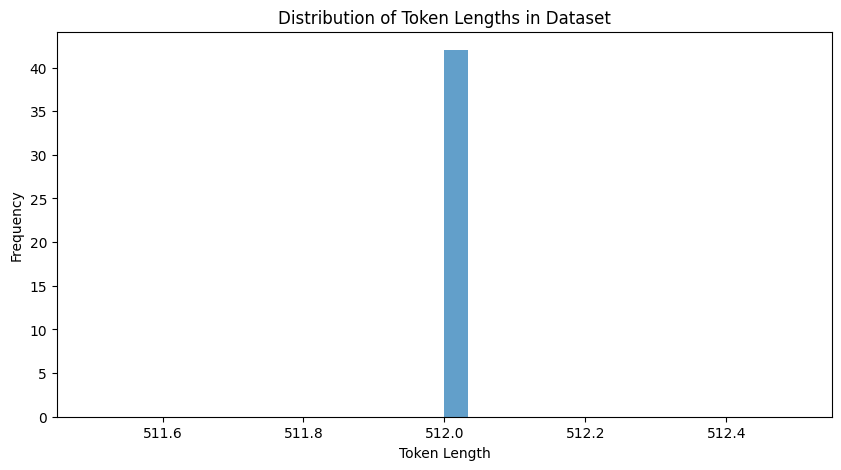

In [20]:
import matplotlib.pyplot as plt

# Extract token lengths
token_lengths = [len(example["input_ids"]) for example in tokenized_dataset["train"]]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(token_lengths, bins=30, alpha=0.7)
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.title("Distribution of Token Lengths in Dataset")
plt.show()


# **Training Loss Over Epochs**

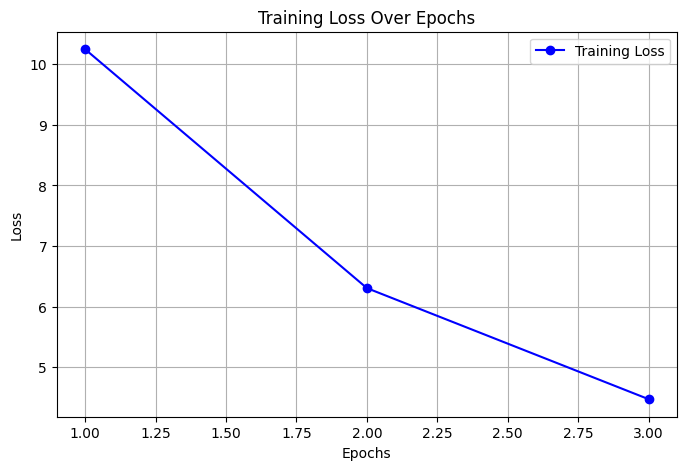

In [21]:
epochs = [1, 2, 3]
loss_values = [10.2490, 6.3059, 4.4721]  # Replace with actual loss values from training

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss_values, marker="o", linestyle="-", color="b", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()
